In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
df_feat = pd.DataFrame(wine['data'],columns=wine['feature_names'])
df_feat.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df_target = pd.DataFrame(wine['target'],columns=['Wine'])
df_target.head()

,Wine
0,0
1,0
2,0
3,0
4,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_target)
scaled_features = scaler.transform(df_target)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[18  0  1]
 [ 3 11  2]
 [ 1 10  8]]


In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.52      0.69      0.59        16
           2       0.73      0.42      0.53        19

    accuracy                           0.69        54
   macro avg       0.69      0.69      0.67        54
weighted avg       0.70      0.69      0.67        54



In [11]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

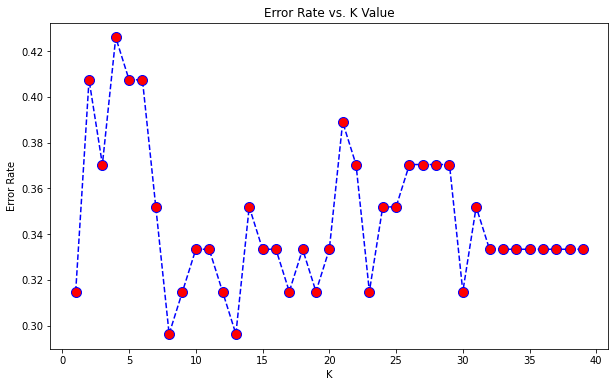

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=1
[[18  0  1]
 [ 3 11  2]
 [ 1 10  8]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.52      0.69      0.59        16
           2       0.73      0.42      0.53        19

    accuracy                           0.69        54
   macro avg       0.69      0.69      0.67        54
weighted avg       0.70      0.69      0.67        54



In [17]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=23
[[18  0  1]
 [ 2 12  2]
 [ 1 11  7]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.52      0.75      0.62        16
           2       0.70      0.37      0.48        19

    accuracy                           0.69        54
   macro avg       0.69      0.69      0.67        54
weighted avg       0.70      0.69      0.67        54

